In [1]:
import pandas as pd, numpy as np, seaborn as sbn, matplotlib.pyplot as plt

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle

In [2]:
csv_file_path = 'Data/finalists_cleaned.csv'
eurovision_df = pd.read_csv(csv_file_path, encoding='windows-1252')

In [3]:
eurovision_df

,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
0,2023,20,Norway,Pop,216.0,52.0,36.0,11.0,5.0,268.0
1,2023,5,Serbia,Pop,16.0,14.0,4.0,6.0,24.0,30.0
2,2023,2,Portugal,Pop,16.0,43.0,3.0,9.0,23.0,59.0
3,2023,25,Croatia,Pop,112.0,11.0,20.0,2.0,13.0,123.0
4,2023,3,Switzerland,Ballad,31.0,61.0,10.0,15.0,20.0,92.0
...,...,...,...,...,...,...,...,...,...,...
353,2009,3,France,Ballad,54.0,164.0,NaN,NaN,8.0,218.0
354,2009,10,Russia,Ballad,118.0,67.0,NaN,NaN,11.0,185.0
355,2009,17,Germany,Pop,18.0,73.0,NaN,NaN,20.0,91.0
356,2009,23,United Kingdom,Ballad,105.0,223.0,NaN,NaN,5.0,328.0


In [4]:
dropped_columns = ['style', 'final_televote_votes', 'final_jury_votes', 'country']
jury_televote = eurovision_df.drop(columns=dropped_columns)

In [5]:
jury_televote

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0
...,...,...,...,...,...,...
353,2009,3,54.0,164.0,8.0,218.0
354,2009,10,118.0,67.0,11.0,185.0
355,2009,17,18.0,73.0,20.0,91.0
356,2009,23,105.0,223.0,5.0,328.0


In [6]:
jury_televote.isnull().sum()

year                      0
final_draw_position       0
final_televote_points    32
final_jury_points        32
final_place               0
final_total_points        0
dtype: int64

In [7]:
# Show the rows with any null values in the jury_televote DataFrame
null_rows = jury_televote[jury_televote.isnull().any(axis=1)]

# Display the rows with null values
null_rows

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
212,2014,24,NaN,NaN,2.0,0.0
231,2013,7,NaN,NaN,20.0,0.0
232,2013,18,NaN,NaN,1.0,0.0
233,2013,10,NaN,NaN,5.0,0.0
234,2013,22,NaN,NaN,3.0,0.0
235,2013,13,NaN,NaN,9.0,0.0
236,2013,2,NaN,NaN,22.0,0.0
237,2013,8,NaN,NaN,16.0,0.0
238,2013,3,NaN,NaN,11.0,0.0
239,2013,26,NaN,NaN,26.0,0.0


In [8]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
jury_televote_imputed = pd.DataFrame(imputer.fit_transform(jury_televote), columns=jury_televote.columns)

# Display the first few rows of the imputed DataFrame
jury_televote_imputed.head()


,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023.0,20.0,216.0,52.0,5.0,268.0
1,2023.0,5.0,16.0,14.0,24.0,30.0
2,2023.0,2.0,16.0,43.0,23.0,59.0
3,2023.0,25.0,112.0,11.0,13.0,123.0
4,2023.0,3.0,31.0,61.0,20.0,92.0


In [9]:
jury_televote.head()

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0


In [10]:
# Print the column names of your DataFrame
print(jury_televote_imputed.columns)


Index(['year', 'final_draw_position', 'final_televote_points',
       'final_jury_points', 'final_place', 'final_total_points'],
      dtype='object')


In [11]:
# Check if there are any missing values in key columns (jury points and televote points)
print(jury_televote_imputed[['final_jury_points', 'final_televote_points', 'final_draw_position']].isnull().sum())


final_jury_points        0
final_televote_points    0
final_draw_position      0
dtype: int64


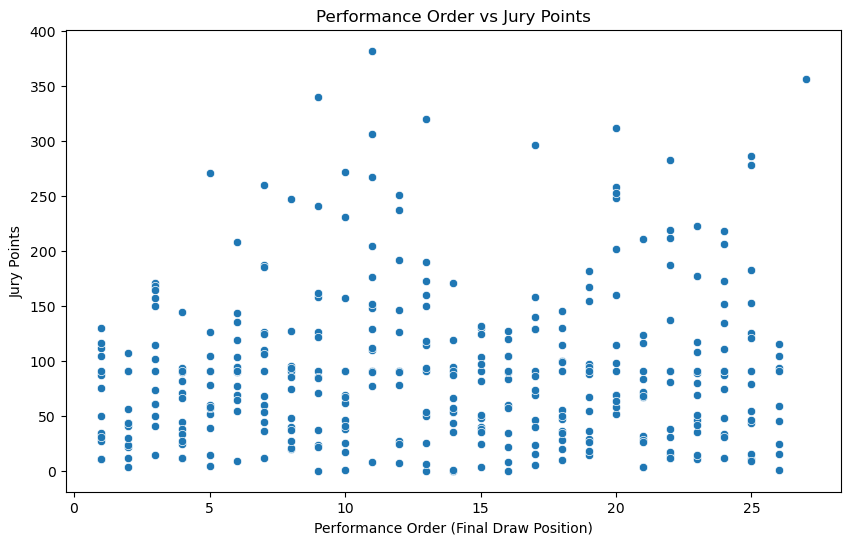

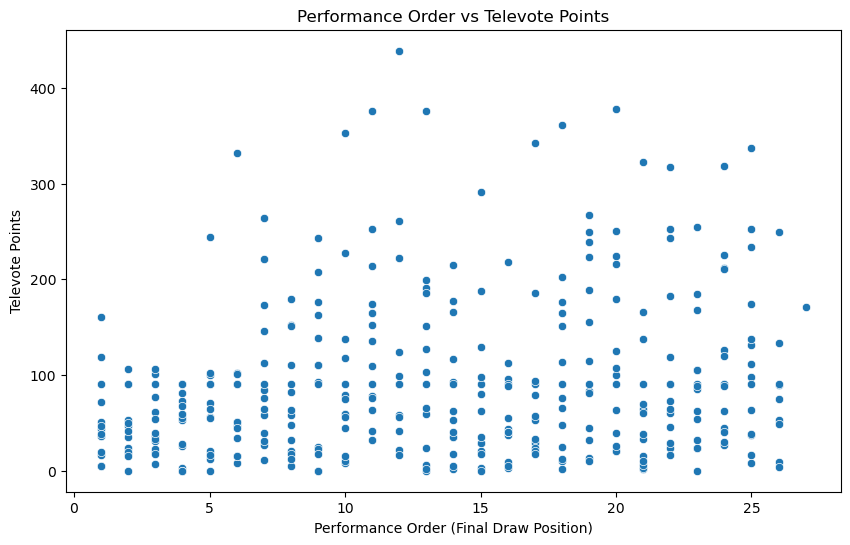

In [12]:
# Scatter plot of Performance Order vs Jury Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_jury_points')
plt.title('Performance Order vs Jury Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Jury Points')
plt.show()

# Scatter plot of Performance Order vs Televote Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_televote_points')
plt.title('Performance Order vs Televote Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Televote Points')
plt.show()

In [13]:
# Calculate the correlation between Performance Order and Jury Points
jury_corr = jury_televote_imputed[['final_draw_position', 'final_jury_points']].corr()
print("Correlation between Performance Order and Jury Points:")
print(jury_corr)

# Calculate the correlation between Performance Order and Televote Points
televote_corr = jury_televote_imputed[['final_draw_position', 'final_televote_points']].corr()
print("Correlation between Performance Order and Televote Points:")
print(televote_corr)


Correlation between Performance Order and Jury Points:
                     final_draw_position  final_jury_points
final_draw_position              1.00000            0.08098
final_jury_points                0.08098            1.00000
Correlation between Performance Order and Televote Points:
                       final_draw_position  final_televote_points
final_draw_position               1.000000               0.200002
final_televote_points             0.200002               1.000000


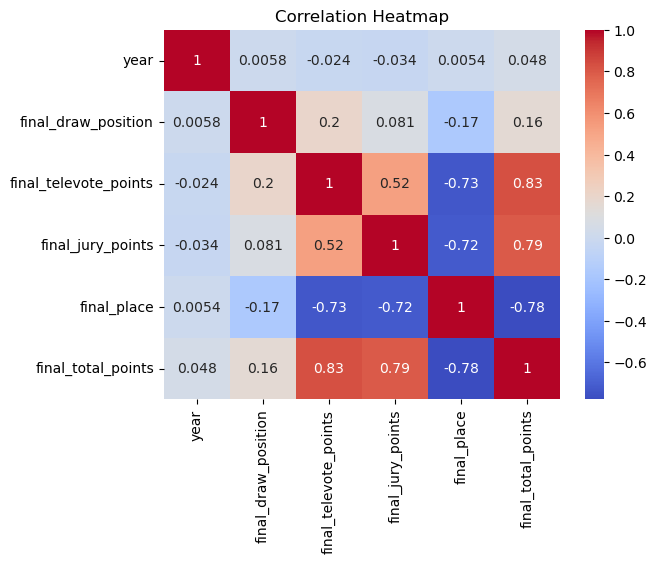

In [14]:
de.vs.correlation_heatmap(jury_televote_imputed)

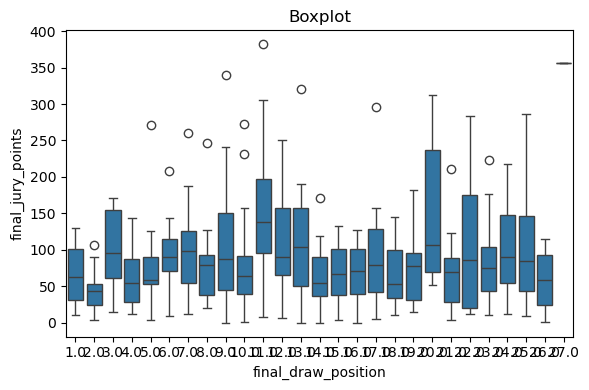

In [15]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')

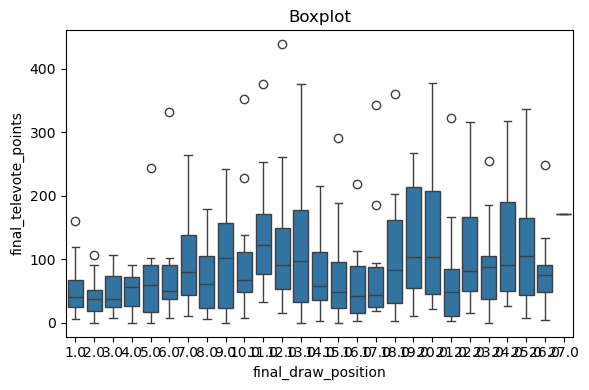

In [16]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')

<Figure size 600x400 with 0 Axes>

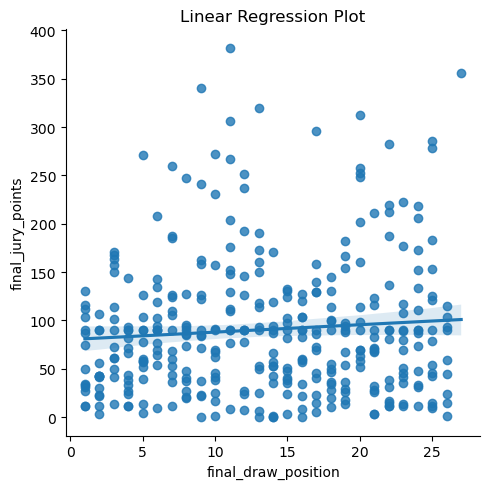

In [17]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')
# the smaller the semi_place - the better

<Figure size 600x400 with 0 Axes>

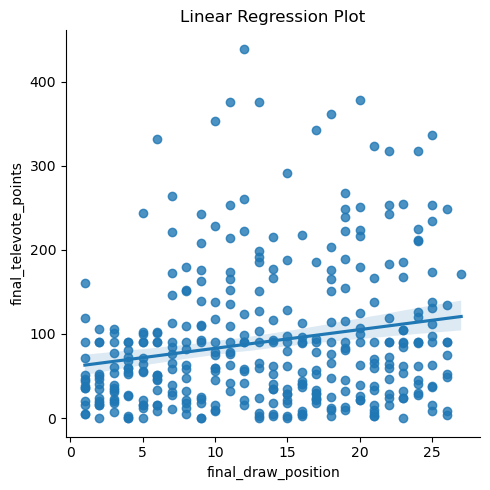

In [18]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')
# the smaller the semi_place - the better

### Training and testing machine learning

In [20]:
from sklearn.linear_model import LinearRegression

X_jury_train, X_jury_test, y_jury_train, y_jury_test = ml.prepare_data(jury_televote_imputed.drop(columns=['final_televote_points']), 'final_jury_points')

jury_model = ml.train_linear_reg_model(X_jury_train, y_jury_train)

ml.evaluate_model(jury_model, X_jury_test, y_jury_test)


C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 34.23264322788873,
 'MSE': 1917.0502974726155,
 'RMSE': 43.7841329418845,
 'R2': 0.5050200545882937,
 'predictions': array([232.17733358,   9.59270142,  97.42350014, 108.58903555,
         46.79821107, 140.80840667,  55.10875462,  10.96803869,
         42.49909392,  57.92035283,  27.87112416, 118.65222327,
         21.12822834, 222.66625104, 110.76398408,  59.96795728,
         31.10061145,  20.70291733,  79.93771016,  83.83504893,
         61.56999033,  14.72489274,  65.22697843, 147.56363604,
         41.85285084, 101.92383004,  69.68069595,   7.86711028,
        165.40393563,  51.11303121,  47.55168853, 214.71532441,
        105.19450291,  61.34863222,  80.99415533,  87.76652483,
         51.80343179, 128.07055915,  36.90012218,  94.37176429,
        110.98797536,   9.02888341, 115.9619577 ,  35.08580167,
         98.90373936,  23.94449   ,  71.95022575,  24.21438472,
        183.92802936, 160.49345713,  25.47978313, 101.49606322,
         54.24291814,  71.94550881,  52.1195

In [21]:
X_televote_train, X_televote_test, y_televote_train, y_televote_test = ml.prepare_data(jury_televote_imputed.drop(columns=['final_jury_points']), 'final_televote_points')

tele_model = ml.train_linear_reg_model(X_televote_train, y_televote_train)

ml.evaluate_model(tele_model, X_televote_test, y_televote_test)

C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 35.98720615412381,
 'MSE': 2413.0363478433815,
 'RMSE': 49.12266633483347,
 'R2': 0.6123766818296963,
 'predictions': array([254.75291872,  -4.13679787,  94.31543463, 116.06297812,
         26.33979962, 142.80503249,  44.95023475,   0.75419078,
         40.63431091,  40.89310585,  16.79284578, 106.75308933,
         -0.99186968, 246.63208098, 114.8110844 ,  64.45349069,
         10.68662014,  -0.36428265,  78.75799392,  87.75877519,
         42.33408161,   2.93434869,  51.54652085, 150.9061698 ,
         35.90509944, 101.8856168 ,  70.79967585,   2.90024878,
        183.80616391,  53.75585331,  30.22070479, 241.95187615,
        113.77000261,  47.6083373 ,  87.78106055,  93.7257351 ,
         38.62030162, 125.15988403,  39.28642422,  93.26869442,
        101.84373458,  -2.80238944, 113.12130564,  21.2325747 ,
         95.11177263,   3.75722096,  68.06837409,  -0.91009746,
        195.7962994 , 167.17966125,  18.87224541, 108.06574775,
         58.33825083,  64.02461988,  46.635

Mean Absolute Error (MAE) =  34.23264322788873
Mean Squared Error (MSE) =  1917.0502974726155
Root Mean Squared Error (RMSE) =  43.7841329418845
R2 (R-squared) score =  0.5050200545882937
Explained variance score =  0.5069


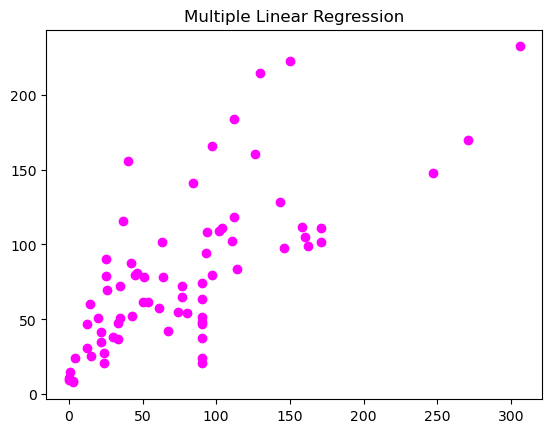

In [22]:
# JURY ERROR MARGIN
y_jury_predicted = jury_model.predict(X_jury_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_jury_test, y_jury_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_jury_test, y_jury_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_jury_test, y_jury_predicted)))


# R-squared
r2_jury_score = metrics.r2_score(y_jury_test, y_jury_predicted)
print ("R2 (R-squared) score = ", r2_jury_score)
eV_jury = round(metrics.explained_variance_score(y_jury_test, y_jury_predicted), 4)
print('Explained variance score = ',eV_jury )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_jury_test, y_jury_predicted, color='magenta')
plt.show()


Mean Absolute Error (MAE) =  35.98720615412381
Mean Squared Error (MSE) =  2413.0363478433815
Root Mean Squared Error (RMSE) =  49.12266633483347
R2 (R-squared) score =  0.6123766818296963
Explained variance score =  0.6136


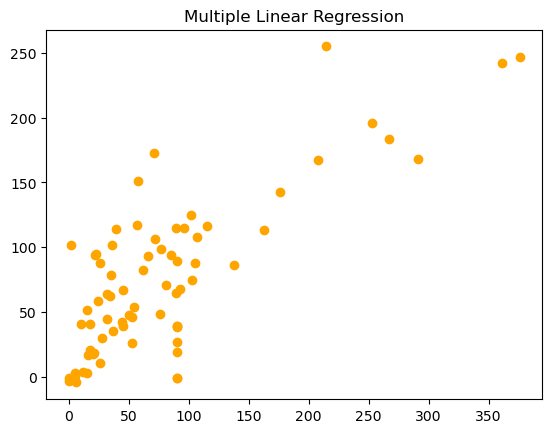

In [23]:
# TELEVOTE ERROR MARGIN
y_televote_predicted = tele_model.predict(X_televote_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_televote_test, y_televote_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_televote_test, y_televote_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_televote_test, y_televote_predicted)))


# R-squared
r2_tele_score = metrics.r2_score(y_televote_test, y_televote_predicted)
print ("R2 (R-squared) score = ", r2_tele_score)
eV_tele = round(metrics.explained_variance_score(y_televote_test, y_televote_predicted), 4)
print('Explained variance score = ',eV_tele )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_televote_test, y_televote_predicted, color='orange')
plt.show()

In [25]:
#ml.save_model(jury_model, 'jury_running_order')

In [27]:
#ml.save_model(tele_model, 'televote_running_order')

In [31]:
print(X_jury_train.columns)

Index(['year', 'final_draw_position', 'final_place', 'final_total_points'], dtype='object')


In [45]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Select the features for the Jury model (including final_draw_position)
X_jury = jury_televote_imputed[['year', 'final_draw_position', 'final_place', 'final_total_points', 'final_jury_points']]  # Jury model features (excluding final_jury_points)
y_jury = jury_televote_imputed['final_jury_points']  # Target for the Jury model

# Prepare the data (train/test split) for Jury points prediction
X_jury_train, X_jury_test, y_jury_train, y_jury_test = ml.prepare_data(X_jury, 'final_jury_points')

print(X_jury_train.columns)

# Train the RandomForest model for Jury points prediction
rf_jury_model = RandomForestRegressor()
rf_jury_model.fit(X_jury_train, y_jury_train)

# Print feature importances for Jury model
jury_feature_importances = pd.Series(rf_jury_model.feature_importances_, index=X_jury.columns)
jury_feature_importances = jury_feature_importances.sort_values(ascending=False)

# Display sorted feature importances for Jury model
print("Jury Model - Feature Importances:")
print(jury_feature_importances)




Index(['year', 'final_draw_position', 'final_place', 'final_total_points'], dtype='object')


ValueError: Length of values (4) does not match length of index (5)

In [ ]:
# Select the features for the Televote model (including final_draw_position)
X_televote = jury_televote_imputed[['year', 'final_draw_position', 'final_place', 'final_total_points']]  # Televote model features (excluding final_televote_points)
y_televote = jury_televote_imputed['final_televote_points']  # Target for the Televote model

# Prepare the data (train/test split) for Televote points prediction
X_televote_train, X_televote_test, y_televote_train, y_televote_test = ml.prepare_data(X_televote, 'final_televote_points')

# Train the RandomForest model for Televote points prediction
rf_televote_model = RandomForestRegressor()
rf_televote_model.fit(X_televote_train, y_televote_train)

# Print feature importances for Televote model
televote_feature_importances = pd.Series(rf_televote_model.feature_importances_, index=X_televote.columns)
televote_feature_importances = televote_feature_importances.sort_values(ascending=False)

# Display sorted feature importances for Televote model
print("Televote Model - Feature Importances:")
print(televote_feature_importances)
